<a href="https://colab.research.google.com/github/deepalikamble33/DataScience/blob/main/Assignment1_File3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare a detailed python notebook using multilayer perceptron for 
classifying the images from MNIST Fashion Dataset with the best accuracy

# Prepare Dataset for the Model

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
mnistf=keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test)=mnistf.load_data()

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [44]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train= x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)

In [45]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255


In [46]:
y_train = keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

# Develop a Single Layer Perceptron model for classification

In [47]:
from keras import Sequential
from keras.layers import Dense

In [48]:
model_0= keras.Sequential()
model_0.add(Dense(10,input_shape=(784,),name= 'dense_layer', activation = 'softmax'))

In [49]:
model_0.compile(optimizer= 'Adam',
                loss= 'categorical_crossentropy',
                metrics= ['accuracy'])

In [50]:
training= model_0.fit(x_train, y_train, batch_size= 32, epochs = 10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6295 - accuracy: 0.7887 - val_loss: 0.4934 - val_accuracy: 0.8320
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4745 - accuracy: 0.8382 - val_loss: 0.4689 - val_accuracy: 0.8393
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4443 - accuracy: 0.8478 - val_loss: 0.4425 - val_accuracy: 0.8448
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4277 - accuracy: 0.8541 - val_loss: 0.4332 - val_accuracy: 0.8505
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4186 - accuracy: 0.8559 - val_loss: 0.4298 - val_accuracy: 0.8512
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.8567 - val_loss: 0.4237 - val_accuracy: 0.8541
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.8615 - val_loss: 0.4229 - val_accuracy:

#  Plot the change in accuracy per epochs 

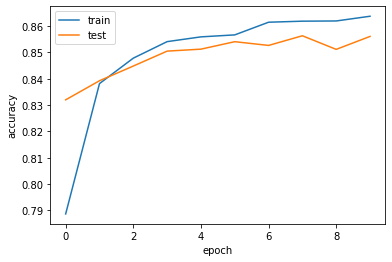

In [51]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#  Evaluate the model on the testing data

In [52]:
model_0.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8457


[0.44455987215042114, 0.8457000255584717]

#  Analyze the model summary


In [53]:
model_0.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Add a hidden layer to the model to make it Multilayer Perceptron


In [58]:
model_1= keras.Sequential()
model_1.add(Dense(300, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dense(10, name= 'dense_layer2', activation='Softmax'))

In [59]:
model_1.compile(optimizer= 'Adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

In [60]:
training= model_1.fit(x_train, y_train, batch_size= 32, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4968 - accuracy: 0.8234 - val_loss: 0.4174 - val_accuracy: 0.8500
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3728 - accuracy: 0.8645 - val_loss: 0.3546 - val_accuracy: 0.8726
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3324 - accuracy: 0.8775 - val_loss: 0.3280 - val_accuracy: 0.8788
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3094 - accuracy: 0.8865 - val_loss: 0.3336 - val_accuracy: 0.8784
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2860 - accuracy: 0.8945 - val_loss: 0.3235 - val_accuracy: 0.8830
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2742 - accuracy: 0.8974 - val_loss: 0.3260 - val_accuracy: 0.8822
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2600 - accuracy: 0.9026 - val_loss: 0.3170 - val_accuracy:

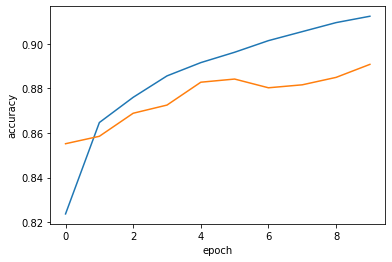

In [57]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [61]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8814


[0.3449333906173706, 0.8813999891281128]

In [62]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 300)               235500    
                                                                 
 dense_layer2 (Dense)        (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


#  Add Dropout to prevent overfitting and check its effect on accuracy

In [63]:
from keras.layers import Dropout
model_1= keras.Sequential()
model_1.add(Dense(300, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, name= 'dense_layer2', activation='Softmax'))

In [64]:
model_1.compile(optimizer= 'Adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

In [65]:
training= model_1.fit(x_train, y_train, batch_size= 32, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5652 - accuracy: 0.7973 - val_loss: 0.4261 - val_accuracy: 0.8433
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4298 - accuracy: 0.8425 - val_loss: 0.3821 - val_accuracy: 0.8603
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3949 - accuracy: 0.8546 - val_loss: 0.3556 - val_accuracy: 0.8694
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3789 - accuracy: 0.8611 - val_loss: 0.3512 - val_accuracy: 0.8742
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3586 - accuracy: 0.8681 - val_loss: 0.3465 - val_accuracy: 0.8758
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3490 - accuracy: 0.8717 - val_loss: 0.3322 - val_accuracy: 0.8793
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3356 - accuracy: 0.8750 - val_loss: 0.3258 - val_accuracy:

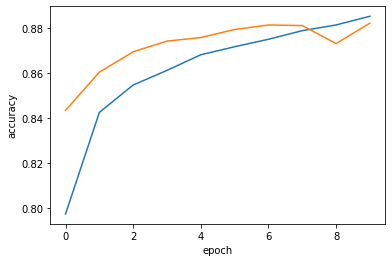

In [66]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [67]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3615 - accuracy: 0.8742


[0.36152681708335876, 0.8741999864578247]

In [68]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_layer2 (Dense)        (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


#  Increase the number of hidden layer neuron and check its accuracy

In [69]:
from keras.layers import Dropout
model_1= keras.Sequential()
model_1.add(Dense(500, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, name= 'dense_layer2', activation='Softmax'))

model_1.compile(optimizer= 'Adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

training= model_1.fit(x_train, y_train, batch_size= 32, epochs=10, validation_split=.2)

1500/1500 [==============================] - 9s 6ms/step - loss: 0.5526 - accuracy: 0.8014 - val_loss: 0.4146 - val_accuracy: 0.8529
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4232 - accuracy: 0.8457 - val_loss: 0.3806 - val_accuracy: 0.8578
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3905 - accuracy: 0.8561 - val_loss: 0.3582 - val_accuracy: 0.8673
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3674 - accuracy: 0.8640 - val_loss: 0.3546 - val_accuracy: 0.8733
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3556 - accuracy: 0.8687 - val_loss: 0.3325 - val_accuracy: 0.8802
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3393 - accuracy: 0.8742 - val_loss: 0.3253 - val_accuracy: 0.8848
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3307 - accuracy: 0.8764 - val_loss: 0.3323 - val_accuracy: 0.8792
Epo

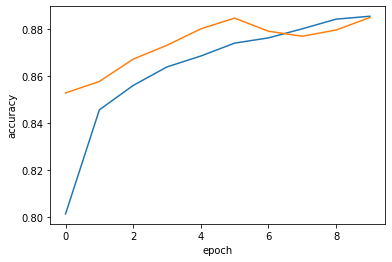

In [70]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [71]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3497 - accuracy: 0.8787


[0.3496970534324646, 0.8787000179290771]

In [72]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 500)               392500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_layer2 (Dense)        (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


#  Use different optimizers and check its effect on accuracy

In [73]:
from keras.layers import Dropout
model_1= keras.Sequential()
model_1.add(Dense(500, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, name= 'dense_layer2', activation='Softmax'))

model_1.compile(optimizer= 'SGD',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

training= model_1.fit(x_train, y_train, batch_size= 32, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8134 - accuracy: 0.7322 - val_loss: 0.5715 - val_accuracy: 0.8093
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5713 - accuracy: 0.8069 - val_loss: 0.5028 - val_accuracy: 0.8304
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5137 - accuracy: 0.8234 - val_loss: 0.4732 - val_accuracy: 0.8330
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4802 - accuracy: 0.8342 - val_loss: 0.4485 - val_accuracy: 0.8443
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4568 - accuracy: 0.8415 - val_loss: 0.4298 - val_accuracy: 0.8503
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4387 - accuracy: 0.8483 - val_loss: 0.4172 - val_accuracy: 0.8533
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4250 - accuracy: 0.8527 - val_loss: 0.4102 - val_accuracy

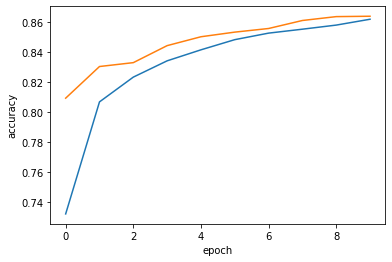

In [74]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [75]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4074 - accuracy: 0.8545


[0.40738755464553833, 0.8544999957084656]

In [76]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 500)               392500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_layer2 (Dense)        (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


#  Increase the hidden layers and check its effect on accuracy

In [77]:
from keras.layers import Dropout
model_1= keras.Sequential()
model_1.add(Dense(500, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dense(100, input_shape=(784,), name='dense_layer2', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, name= 'dense_layer3', activation='Softmax'))

model_1.compile(optimizer= 'SGD',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

training= model_1.fit(x_train, y_train, batch_size= 32, epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8693 - accuracy: 0.7093 - val_loss: 0.5532 - val_accuracy: 0.8134
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5749 - accuracy: 0.8058 - val_loss: 0.4714 - val_accuracy: 0.8360
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5094 - accuracy: 0.8275 - val_loss: 0.4342 - val_accuracy: 0.8472
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4721 - accuracy: 0.8367 - val_loss: 0.4124 - val_accuracy: 0.8529
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4452 - accuracy: 0.8432 - val_loss: 0.4044 - val_accuracy: 0.8558
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4272 - accuracy: 0.8501 - val_loss: 0.3866 - val_accuracy: 0.8610
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4116 - accuracy: 0.8564 - val_loss: 0.3883 - val_accuracy

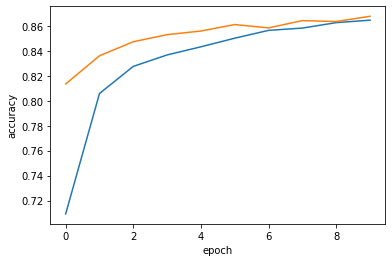

In [78]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [79]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4000 - accuracy: 0.8559


[0.3999907374382019, 0.85589998960495]

In [80]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 500)               392500    
                                                                 
 dense_layer2 (Dense)        (None, 100)               50100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_layer3 (Dense)        (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


#  Manipulate the batch_size and epochs and check its effect on accuracy

In [81]:
from keras.layers import Dropout
model_1= keras.Sequential()
model_1.add(Dense(500, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dense(100, input_shape=(784,), name='dense_layer2', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, name= 'dense_layer3', activation='Softmax'))

model_1.compile(optimizer= 'SGD',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

training= model_1.fit(x_train, y_train, batch_size= 64, epochs=10, validation_split=.2)

Epoch 1/10
750/750 [==============================] - 6s 7ms/step - loss: 1.0157 - accuracy: 0.6714 - val_loss: 0.6217 - val_accuracy: 0.7976
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.6488 - accuracy: 0.7855 - val_loss: 0.5339 - val_accuracy: 0.8202
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.5701 - accuracy: 0.8089 - val_loss: 0.4956 - val_accuracy: 0.8267
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.5247 - accuracy: 0.8230 - val_loss: 0.4610 - val_accuracy: 0.8392
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4979 - accuracy: 0.8311 - val_loss: 0.4447 - val_accuracy: 0.8421
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4767 - accuracy: 0.8378 - val_loss: 0.4273 - val_accuracy: 0.8483
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4599 - accuracy: 0.8429 - val_loss: 0.4165 - val_accuracy: 0.8533
Epoch 

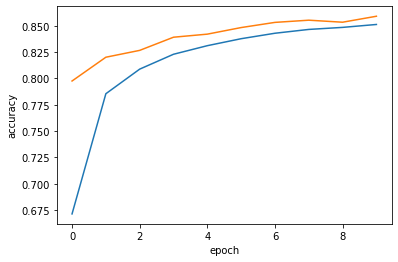

In [82]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [83]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8503


[0.4180617332458496, 0.8503000140190125]

In [84]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 500)               392500    
                                                                 
 dense_layer2 (Dense)        (None, 100)               50100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_layer3 (Dense)        (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [85]:
from keras.layers import Dropout
model_1= keras.Sequential()
model_1.add(Dense(500, input_shape=(784,), name='dense_layer1', activation='relu'))
model_1.add(Dense(100, input_shape=(784,), name='dense_layer2', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, name= 'dense_layer3', activation='Softmax'))

model_1.compile(optimizer= 'SGD',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

training= model_1.fit(x_train, y_train, batch_size= 64, epochs=15, validation_split=.2)

Epoch 1/15
750/750 [==============================] - 6s 8ms/step - loss: 1.0165 - accuracy: 0.6648 - val_loss: 0.6378 - val_accuracy: 0.7918
Epoch 2/15
750/750 [==============================] - 5s 7ms/step - loss: 0.6650 - accuracy: 0.7777 - val_loss: 0.5436 - val_accuracy: 0.8167
Epoch 3/15
750/750 [==============================] - 5s 7ms/step - loss: 0.5826 - accuracy: 0.8048 - val_loss: 0.4983 - val_accuracy: 0.8295
Epoch 4/15
750/750 [==============================] - 5s 7ms/step - loss: 0.5357 - accuracy: 0.8172 - val_loss: 0.4658 - val_accuracy: 0.8376
Epoch 5/15
750/750 [==============================] - 5s 7ms/step - loss: 0.5061 - accuracy: 0.8284 - val_loss: 0.4465 - val_accuracy: 0.8387
Epoch 6/15
750/750 [==============================] - 5s 7ms/step - loss: 0.4862 - accuracy: 0.8337 - val_loss: 0.4431 - val_accuracy: 0.8373
Epoch 7/15
750/750 [==============================] - 5s 7ms/step - loss: 0.4658 - accuracy: 0.8405 - val_loss: 0.4191 - val_accuracy: 0.8505
Epoch 

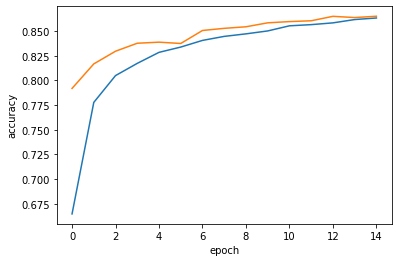

In [86]:
import matplotlib.pyplot as plt
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [87]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8557


[0.3970307409763336, 0.8557000160217285]

In [88]:
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer1 (Dense)        (None, 500)               392500    
                                                                 
 dense_layer2 (Dense)        (None, 100)               50100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_layer3 (Dense)        (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


Parameter to be chosen to classify images- Batch size, Epochs